<h1><span class="label label-default" style="background-color:blue; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">Import Libraries and Data</span></h1>

In [140]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

from plotly import subplots
from plotly.offline import iplot, init_notebook_mode #visualization
import plotly.express as px #visualization
from plotly.subplots import make_subplots #visualization
import plotly.graph_objects as go #visualization
import plotly.offline as py

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# import lightgbm as ltb
import shap

# settings
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('fivethirtyeight')
sns.set(font_scale = 1)  
pd.set_option('display.max_columns', None)

print("Import completed")

Import completed


In [141]:
#loading the dataset
df=pd.read_csv('heart.csv')
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [127]:
df.shape

(918, 12)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<h1><span class="label label-default" style="background-color:blue; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">Statistical Analysis</span></h1>

In [95]:
df.describe()
# df.describe(include='all') 

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [96]:
# df.isnull().sum()
df_info2 = pd.DataFrame(columns=['Name of Col', 'Num of Null', 'Dtype', 'N_unique'])

for i in range(0, len(df.columns)):
    df_info2.loc[i] = [df.columns[i],
                      df[df.columns[i]].isnull().sum(),
                      df[df.columns[i]].dtypes,
                      df[df.columns[i]].nunique()]
    
df_info2

,Name of Col,Num of Null,Dtype,N_unique
0,Age,0,int64,50
1,Sex,0,object,2
2,ChestPainType,0,object,4
3,RestingBP,0,int64,67
4,Cholesterol,0,int64,222
5,FastingBS,0,int64,2
6,RestingECG,0,object,3
7,MaxHR,0,int64,119
8,ExerciseAngina,0,object,2
9,Oldpeak,0,float64,53


In [97]:
from IPython.core.display import HTML

def multi_table(table_list):
    # Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>')
    
cat=['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope','HeartDisease']
df_nunique = {var: pd.DataFrame(df[var].value_counts()) for var in set(cat)}        
multi = []
for i in cat:
    multi.append(df_nunique[i].style.format('{:.2f}')
                 .highlight_max(color = 'yellow')
                 .highlight_min(color = 'turquoise'))
display(multi_table(multi))

for i in cat:
    df_groupby = {var: pd.DataFrame(df.groupby([var, i]).size()) for var in set(cat)}
    multi = []

,Sex
M,725.00
F,193.00
,ChestPainType
ASY,496.00
NAP,203.00
ATA,173.00
TA,46.00
,FastingBS
0,704.00
1,214.00


<h1><span class="label label-default" style="background-color:blue; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">Univariate Analysis</span></h1>

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

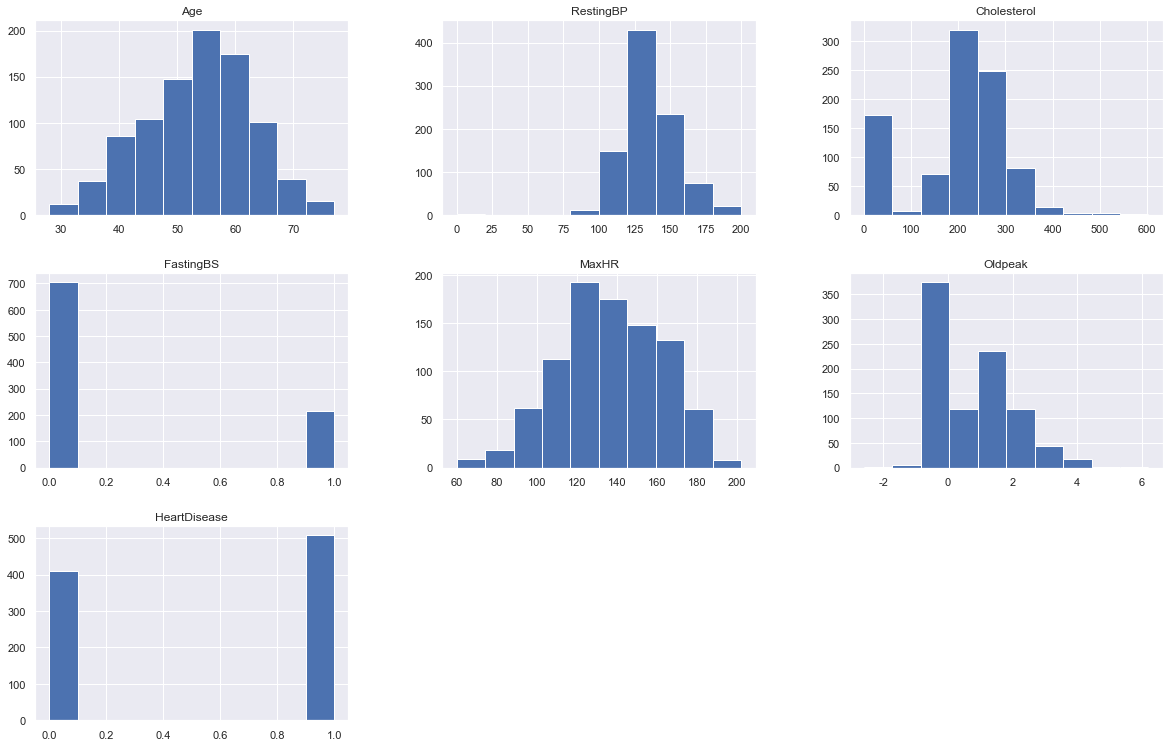

In [129]:
df.hist(figsize=(18,12))

Sex Ratio in Data
M    725
F    193
Name: Sex, dtype: int64


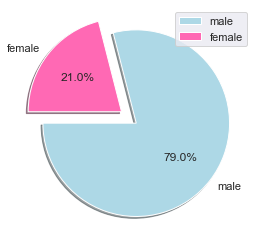

In [142]:
print("Sex Ratio in Data")
print(df["Sex"].value_counts())

plt.pie(df["Sex"].value_counts(), 
        labels = ["male", "female"], 
        colors = ["lightblue","hotpink"], 
        autopct='%1.1f%%', 
        explode = [0,0.2], 
        startangle = 180,
        shadow = True)

plt.legend()
plt.show()

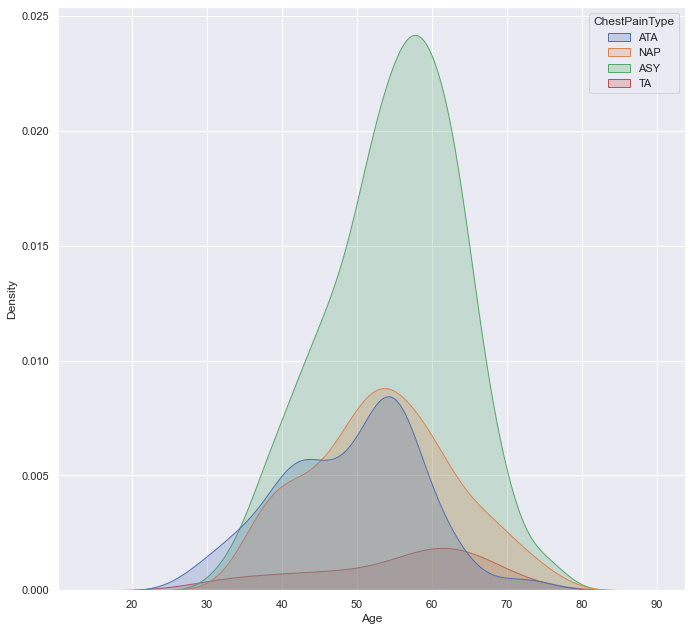

In [131]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
sns.kdeplot(data=df,x='Age',hue='ChestPainType',shade=True)
plt.show()

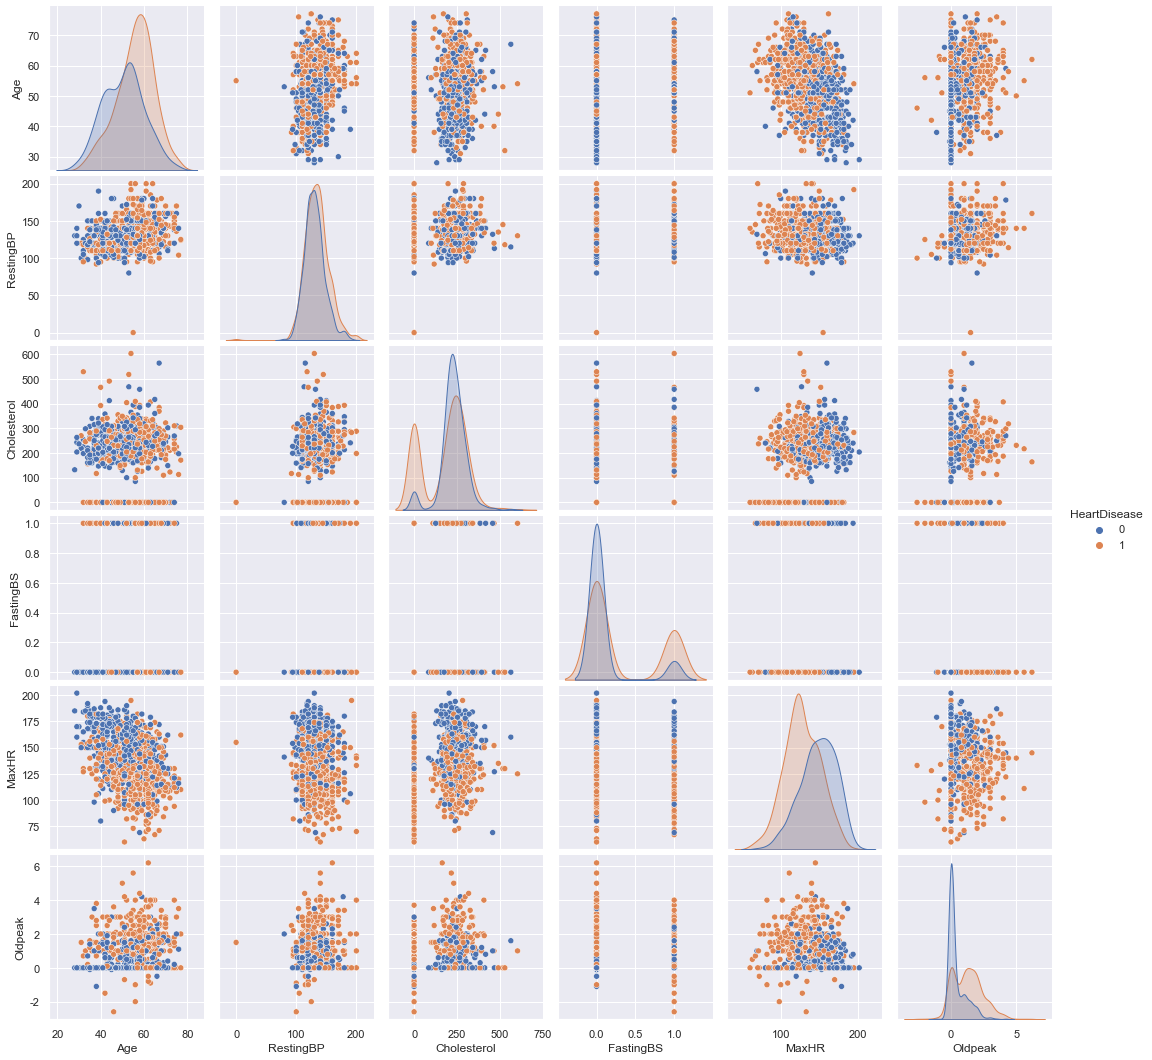

In [101]:
sns.pairplot(df,hue='HeartDisease')

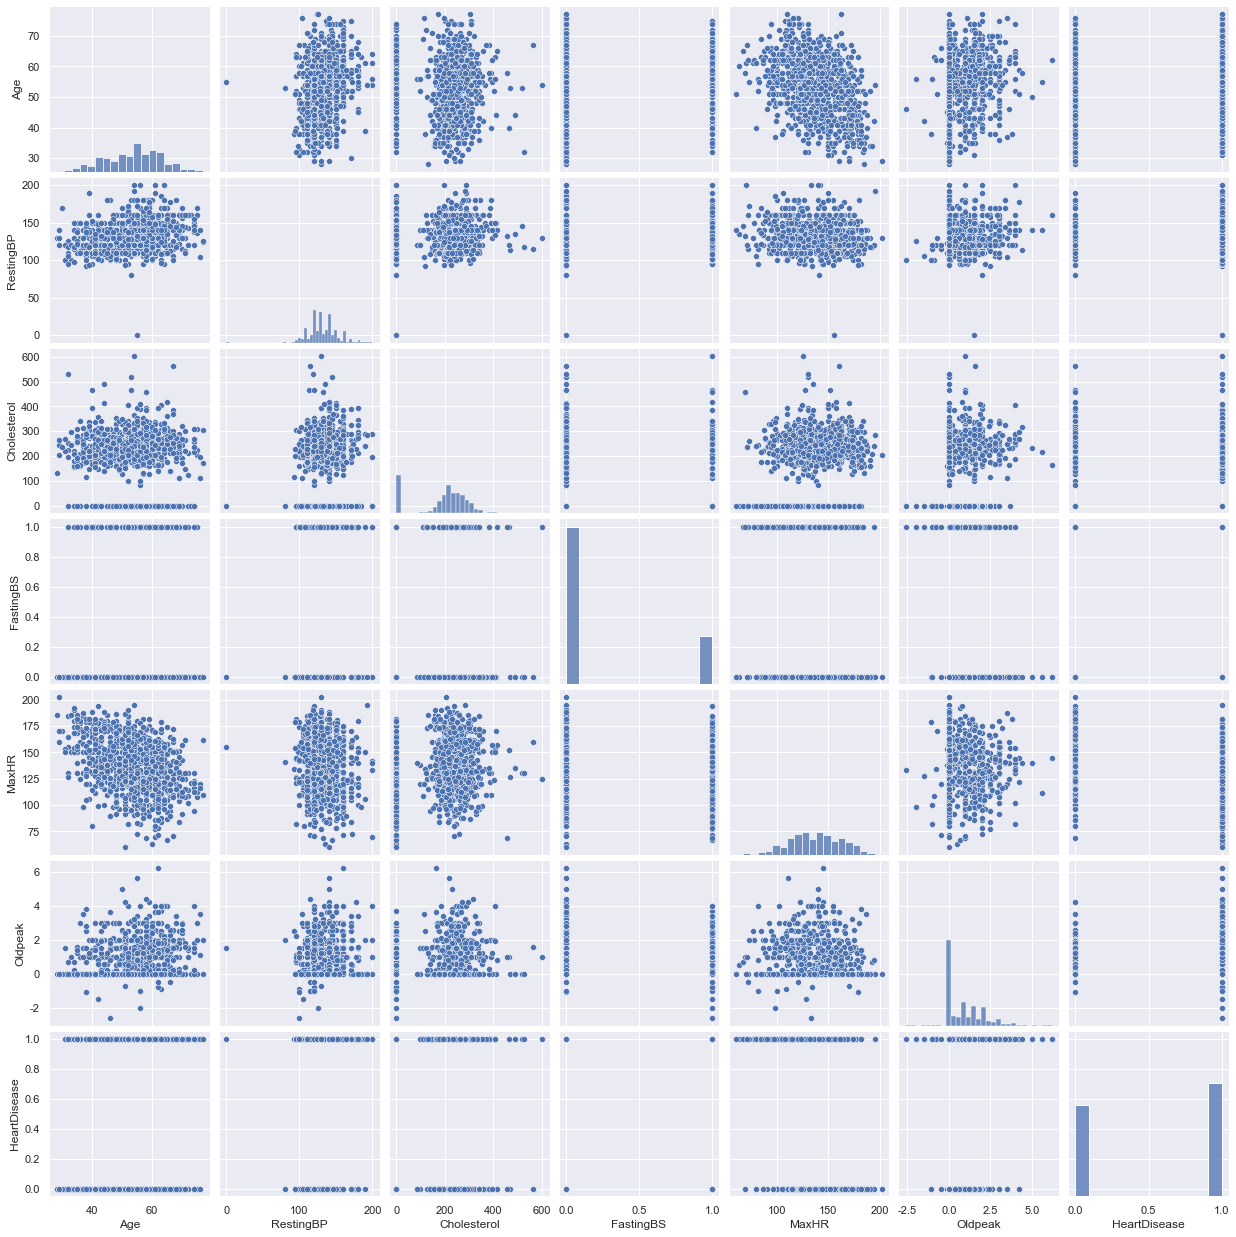

In [102]:
sns.pairplot(df)

# Dividing the data into categorical, numerical, continous, and discrete

In [103]:
# to find out columns with categorical data so that i will know which ones to use encoding for
categorical_data=[f for f in df.columns if df[f].dtype=='O']
categorical_data

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [104]:
# to find out columns with numeric data
numerical_data=[f for f in df.columns if df[f].dtype!='O']
numerical_data

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [105]:
# to find out columns with continuos data for EDA and predictions
numerical_data_continuous=[f for f in numerical_data if df[f].nunique()>10]
numerical_data_continuous

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [106]:
# to find out columns with discrete variables
numerical_data_discrete=[f for f in numerical_data if df[f].nunique()<11]
numerical_data_discrete

['FastingBS', 'HeartDisease']

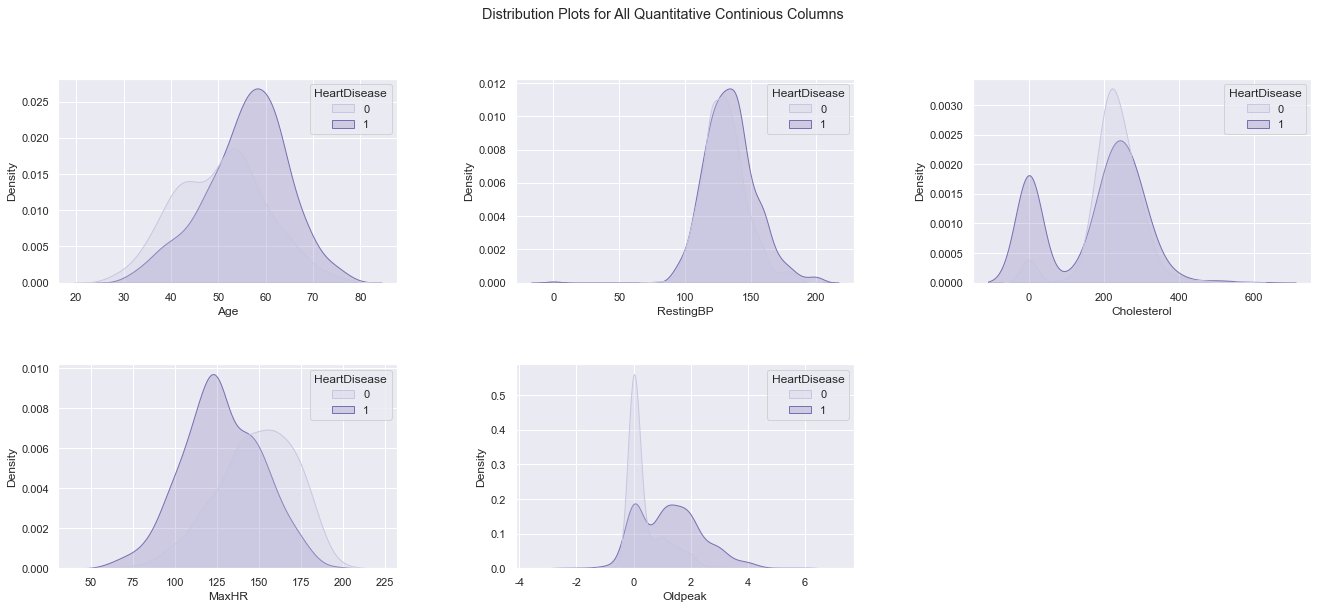

In [107]:
columns = ['Age', 'Resting_Blood_Pressure', 'Cholesterol', 'Max_Heart_Rate', 'Previous_Peak']

plt.figure(figsize=(20,10))

for n, column in enumerate(numerical_data_continuous):
    ax = plt.subplot(2, 3, n + 1)
    sns.kdeplot(data = df, x = column, palette="Purples", shade=True, hue='HeartDisease')
    plt.grid('on')

plt.subplots_adjust(wspace=0.35, bottom=0.2, hspace=0.4)
plt.suptitle("Distribution Plots for All Quantitative Continious Columns")
plt.show()

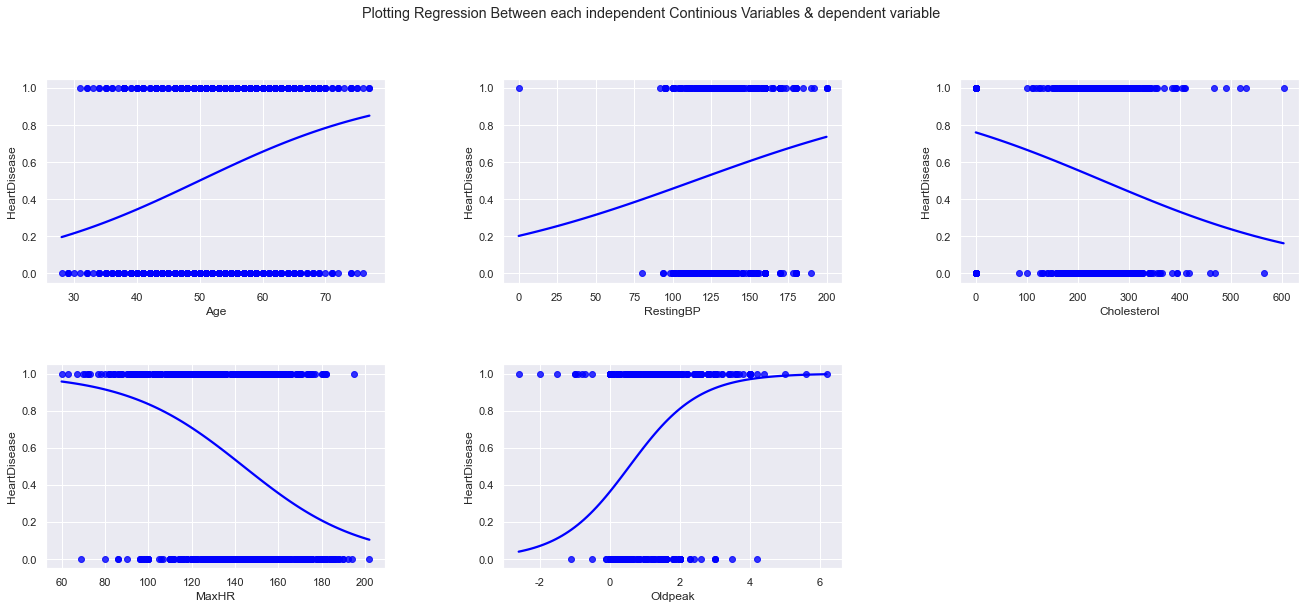

In [108]:
plt.figure(figsize=(20,10))

for n, column in enumerate(numerical_data_continuous):
    ax = plt.subplot(2, 3, n + 1)
    sns.regplot(data = df, x = column, y='HeartDisease', color='blue', logistic=True, ci=None)
    plt.grid('on')

plt.subplots_adjust(wspace=0.35, bottom=0.2, hspace=0.4)
plt.suptitle("Plotting Regression Between each independent Continious Variables & dependent variable")
plt.show()

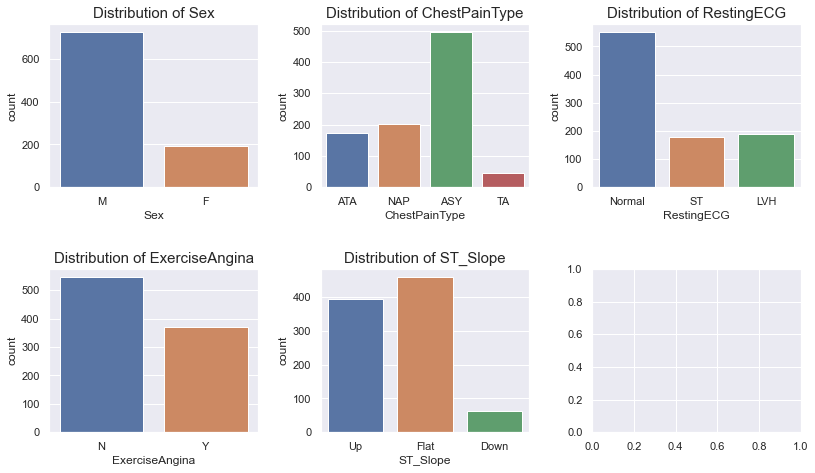

In [109]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (12, 7))
axes = axes.flatten()

for col, ax in zip(categorical_data, axes):
    ax = sns.countplot(data = df, x = col, ax = ax)
    ax.set_title(f"Distribution of {col}", fontsize=15)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    
plt.show()

Skewness of Age =======>>> -0.196
Skewness of RestingBP =======>>> 0.18
Skewness of Cholesterol =======>>> -0.61
Skewness of MaxHR =======>>> -0.144
Skewness of Oldpeak =======>>> 1.023


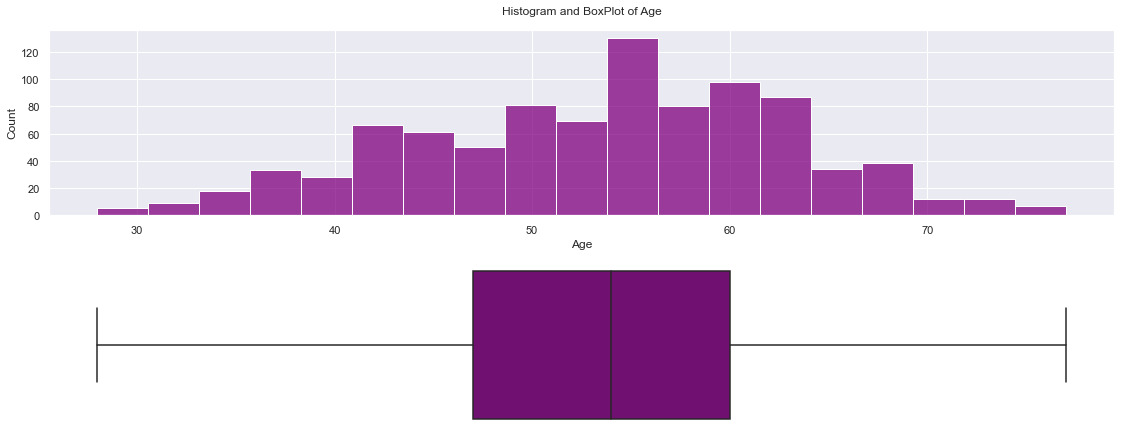

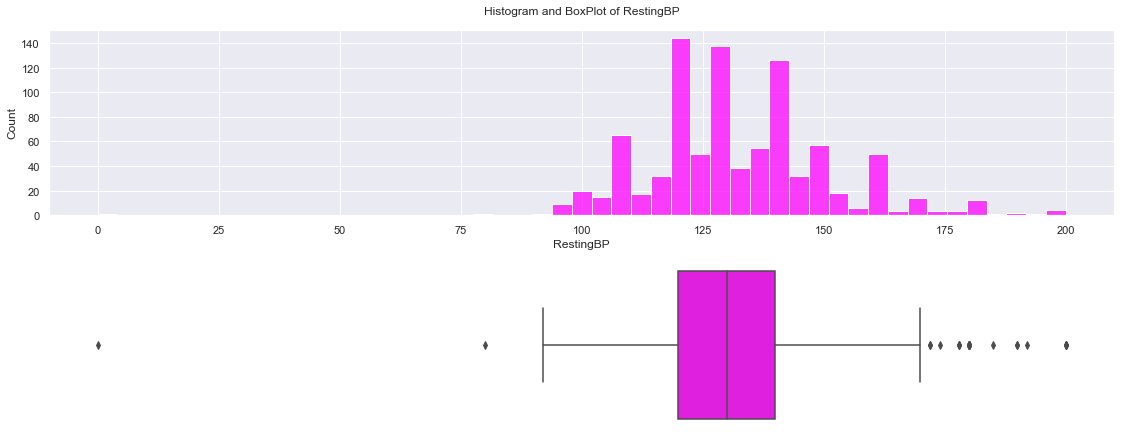

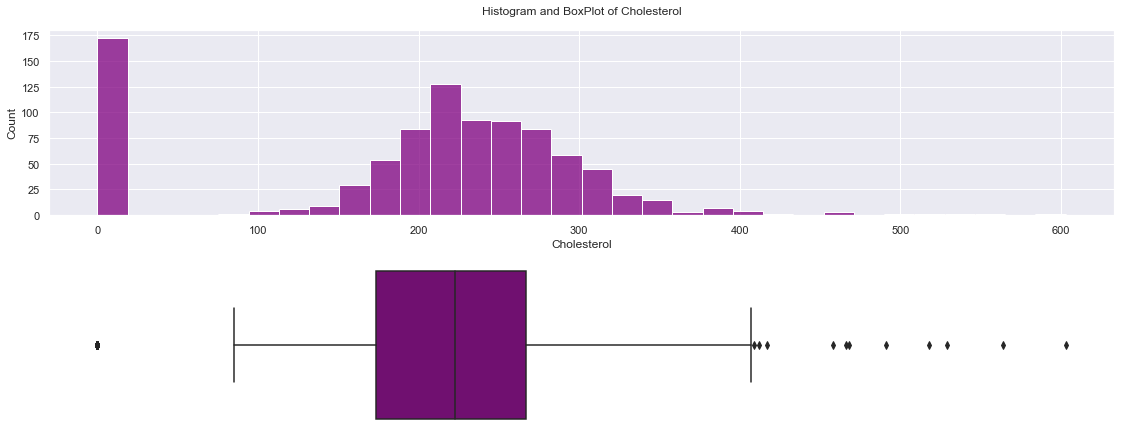

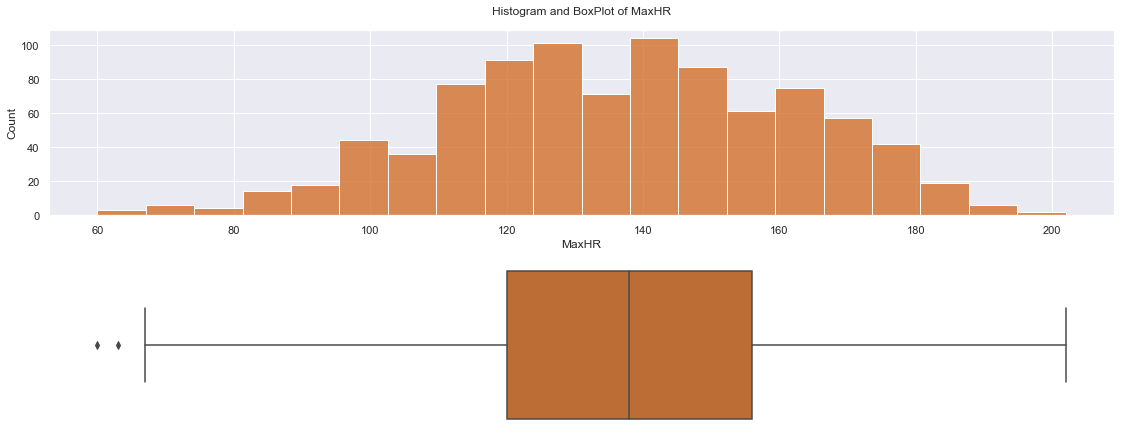

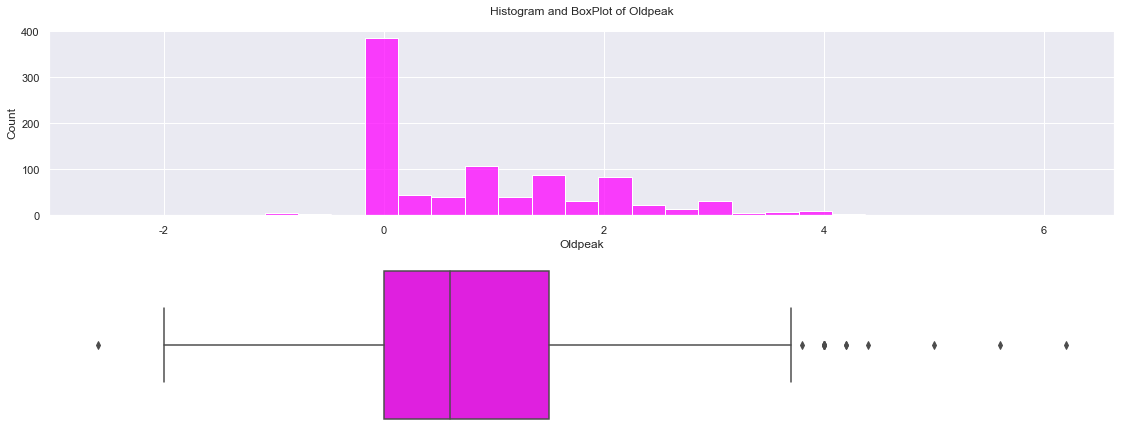

In [132]:
colors = ['chocolate', 'purple', 'magenta']

def distribution_plot(column, title):

    fig = plt.figure(figsize=(17, 7))
    grid = GridSpec(nrows=2, ncols=1, figure=fig)
    color = np.random.choice(colors, 1)[0]

    ax0 = fig.add_subplot(grid[0, :])
    ax0.set_title(f'Histogram and BoxPlot of {title}', y=1.05)
    sns.histplot(column, ax=ax0, color=color)
    
    print(f'Skewness of {title} =======>>> {np.round(column.skew(), 3)}')

    ax1 = fig.add_subplot(grid[1, :])
    plt.axis('off')
    sns.boxplot(x=column, ax=ax1, color=color)

    
# plot distribution graph for continuos data
for x in numerical_data_continuous:
    distribution_plot(df[x], x)

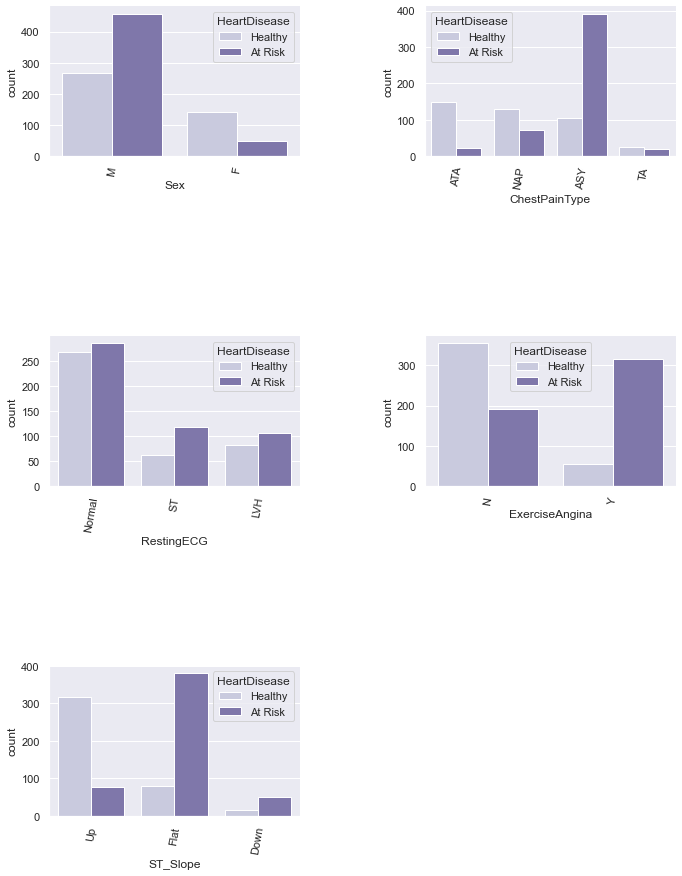

In [111]:
newDf = df.copy()
newDf['HeartDisease'].replace({0:'Healthy', 1:'At Risk'}, inplace = True)

plt.figure(figsize=(10,30))

for n, column in enumerate(categorical_data):
    ax = plt.subplot(5, 2, n + 1)
    sns.countplot(data=newDf, x=column, hue='HeartDisease', palette='Purples')
    plt.xticks(rotation=80)

    for s in ['top', 'right']:
        ax.spines[s].set_visible(False)
    
plt.subplots_adjust(wspace=0.50, hspace=1.2, bottom=0.2)
plt.show()

In [112]:
#creating a copy of dataset for the visualization
eda= df.copy()
#change values to make better visualizations
eda['Sex'] = np.where(eda['Sex'] == 'F', 'Female', 'Male')
eda['HeartDisease'] = np.where(eda['HeartDisease'] == 0, 'Normal', 'Heart Disease')
eda['ExerciseAngina'] = np.where(eda['ExerciseAngina'] == 'N', 'No', 'Yes')
eda["ChestPainType"].replace({'TA': 'Typical Angina', 'ATA': 'Atypical Angina', 
                              'NAP': 'Non-Anginal Pain', 'ASY': 'Asymptomatic'}, inplace= True)
eda["ST_Slope"].replace({'Up': 'Upsloping', 'Down': 'Downsloping',}, inplace= True)

# function for barplots
def barplot_fx(x_col):
    new_df = px.data.tips(x_col)
    text_inplace = f'Heart failure by {x_col}'
    fig = px.histogram(eda, x="HeartDisease",
                 color=x_col, barmode='group', 
                 color_discrete_sequence =colors, opacity=0.9,text_auto=True,
                 height=450, width = 450)
    fig.update_layout(title_text=text_inplace,title_font_size=16, title_x=0.5,
                      font_family='Bahnschrift SemiBold', 
                      yaxis_title=None, xaxis_title=None)
    fig.update_traces(textfont_size=14, textangle=0, textposition="outside", cliponaxis=False,
                     marker_line_width=1,marker_line_color="black")
    fig.show()

for x in categorical_data:
    barplot_fx(x)

***Explanation for the above plot***
- mean and median of "Age" is almost equal - Normally distributed
- mean and median of "RestingBP" is almost equal - Normally distributed
- mean of "Cholestrol" is lesser than its median - Left skewed
- mean and median of "MaxHR" is almost equal - Normally distributed
- mean of "Oldpeak" is greater than its median - Right skewed

<h1><span class="label label-default" style="background-color:#8055b4; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">Bivariate Analysis</span></h1>

<AxesSubplot:>

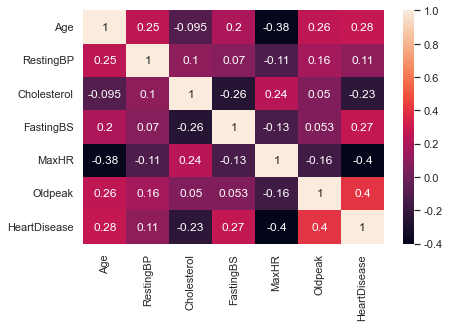

In [133]:
# plot a heatmap using the correlation
sns.heatmap(df.corr(), annot=True)

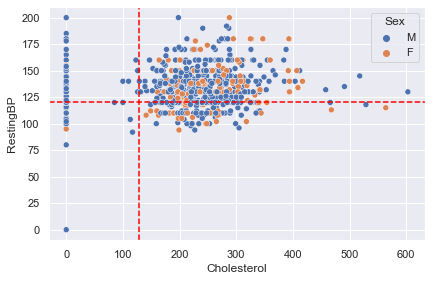

In [114]:
# scatter plot
sns.scatterplot(x='Cholesterol',y='RestingBP',hue='Sex',data=df)
plt.axvline(129, linestyle = '--', color = "red") #normal level for LDL 
plt.axhline(120, linestyle = '--', color = "red") #normal resting BP
plt.show()

<h1><span class="label label-default" style="background-color:blue; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">Modeling</span></h1>

In [134]:
# convert some columns to binary
# I can use Label encoder or numpy

encode_df = df.copy()
cat_columns = [cname for cname in encode_df.columns if encode_df[cname].dtype == 'object']

encoder = preprocessing.LabelEncoder()

for col in cat_columns:
    print(col)
    encode_df[col] = encoder.fit_transform(encode_df[col])
    encode_df[col] = encode_df[col].astype('int64')
encode_df.info()


Sex
ChestPainType
RestingECG
ExerciseAngina
ST_Slope
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


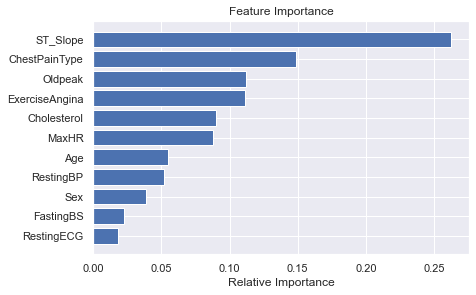

In [135]:
# feature selection
# RandomForestClassifier will be used if the variable is classifiable within yes and no
# RandomForestRegressor will be used if the variable is in a range of numbers

X = encode_df.drop(['HeartDisease'],axis=1)
y = encode_df.HeartDisease

rf_model = RandomForestClassifier(max_depth=7)
rf_model.fit(X,y)
train_features = X.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)
# Feature Importance
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [train_features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [117]:
# after label encoding, perform get dumies / one-hot-encoding
X = pd.get_dummies(X, columns=categorical_data)

In [136]:
#Test and Training the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=1)

#checking the shape of the train and test data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((642, 11), (276, 11), (642,), (276,))

In [137]:
#initiating standard scaler
scaler = preprocessing.StandardScaler()
#Rescale both sets using the trained scaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Decision Tree Classifier
Accuracy: 0.76
Precision: 0.87
Recall: 0.71

              precision    recall  f1-score   support

           0       0.65      0.83      0.73       109
           1       0.87      0.71      0.78       167

    accuracy                           0.76       276
   macro avg       0.76      0.77      0.76       276
weighted avg       0.78      0.76      0.76       276



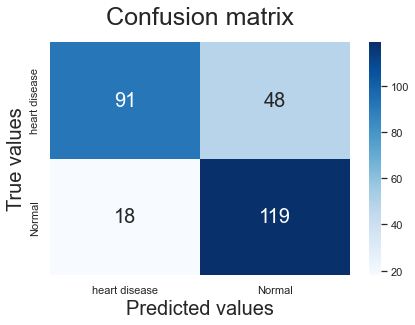



Random Forest Classifier
Accuracy: 0.88
Precision: 0.91
Recall: 0.88

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       109
           1       0.91      0.88      0.90       167

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276



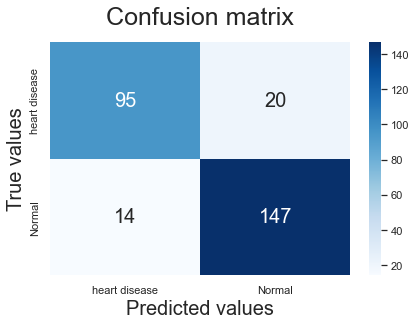



Logistic Regression
Accuracy: 0.87
Precision: 0.92
Recall: 0.86

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       109
           1       0.92      0.86      0.89       167

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.86       276
weighted avg       0.87      0.87      0.87       276



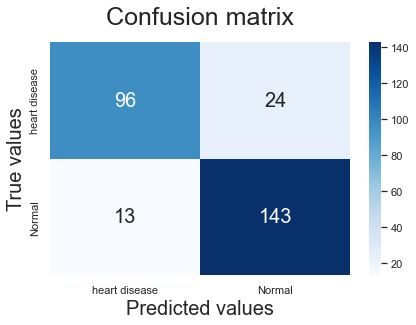



Support Vector Machines
Accuracy: 0.87
Precision: 0.91
Recall: 0.87

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       109
           1       0.91      0.87      0.89       167

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.86       276
weighted avg       0.87      0.87      0.87       276



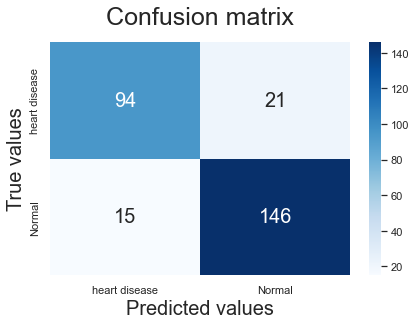



K Nearest Neighbour
Accuracy: 0.83
Precision: 0.90
Recall: 0.81

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       109
           1       0.90      0.81      0.86       167

    accuracy                           0.83       276
   macro avg       0.83      0.84      0.83       276
weighted avg       0.84      0.83      0.83       276



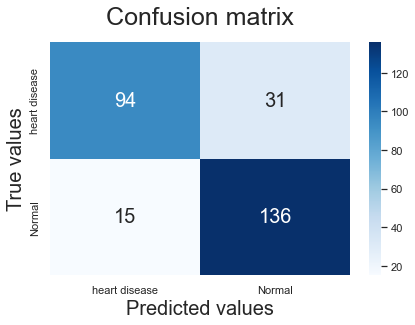



Naive
Accuracy: 0.84
Precision: 0.90
Recall: 0.83

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       109
           1       0.90      0.83      0.86       167

    accuracy                           0.84       276
   macro avg       0.83      0.84      0.84       276
weighted avg       0.85      0.84      0.84       276



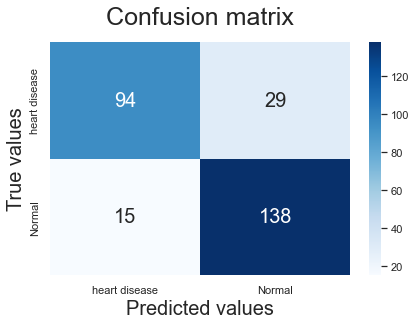

In [138]:
def plot_conf_mat(model, X_test, y_test):
    y_pred = model.predict(X_test)
    matrix = confusion_matrix(y_pred, y_test)
    print(classification_report(y_test, y_pred))
    df_cm = pd.DataFrame(matrix, index = ['heart disease', 'Normal'],
                                columns = ['heart disease', 'Normal'])
    plt.figure(figsize = (6,4))
    sns.heatmap(df_cm,
                annot=True,
                cmap='Blues',
                fmt='.5g',
                annot_kws={"size": 20}).set_title('Confusion matrix', fontsize = 25, y=1.05)
    plt.xlabel('Predicted values', fontsize = 20)
    plt.ylabel('True values', fontsize = 20)
    plt.show()


#creating the parameters
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

classifiers = {
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=500, random_state=1),
    'Logistic Regression': LogisticRegression(solver='liblinear',max_iter=10000),
    'Support Vector Machines': SVC(kernel='linear', random_state=42),
    'K Nearest Neighbour': KNeighborsClassifier(n_neighbors=3, leaf_size=5, p=2),
    'Naive': GaussianNB()
}

summary = list()
for name, clf in classifiers.items():
    print(name)
    nada = clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    pred_accuracy = clf.score(X_test,y_test)
    pred_precision = metrics.precision_score(y_test, y_predict)
    pred_recall = metrics.recall_score(y_test, y_predict)
    
    print(f'Accuracy: {pred_accuracy:.2f}')
    print(f"Precision: {pred_precision:.2f}")
    print(f"Recall: {pred_recall:.2f}")
    print()
    plot_conf_mat(clf, X_test, y_test)
    print("\n")
    
    summary.append({
        'Accuracy':pred_accuracy,
        'Precision':pred_precision,
        'Recall':pred_recall,
        'name': name,
    })

In [121]:
summary = pd.DataFrame(summary)

fig = subplots.make_subplots(rows=1, cols=3, subplot_titles=(
    'Accuracy', 'Precision', 'Recall'
))

trace0 = go.Bar(x=summary['name'], y=summary['Accuracy'], name='Accuracy')
fig.append_trace(trace0, 1, 1)

trace1 = go.Bar(x=summary['name'], y=summary['Precision'], name='Precision')
fig.append_trace(trace1, 1, 2)

trace2 = go.Bar(x=summary['name'], y=summary['Recall'], name='Recall')
fig.append_trace(trace2, 1, 3)

fig['layout'].update(title='Comparing Metrics')
fig['layout'].update(showlegend=False)

py.iplot(fig)

In [139]:
# Create Random Forest classifer object
clf = RandomForestClassifier(n_estimators=900, random_state=1)

# Train Random Forest Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8731884057971014


# I WILL CHECK THE FEATURES THAT CONTRIBUTED MORE IN THE CLASSIFICATION

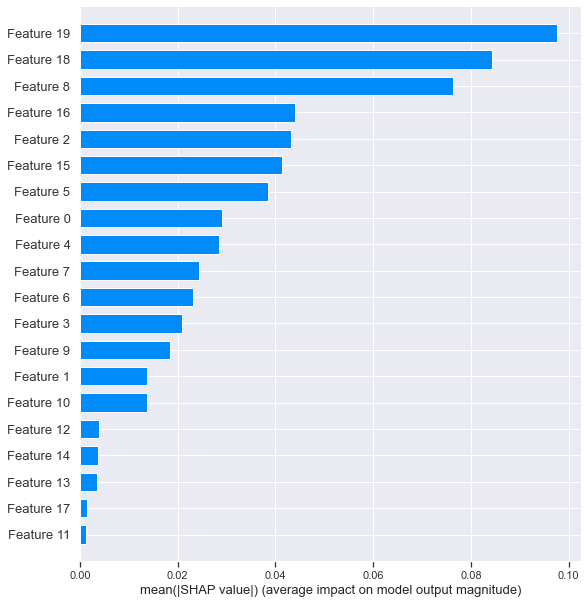

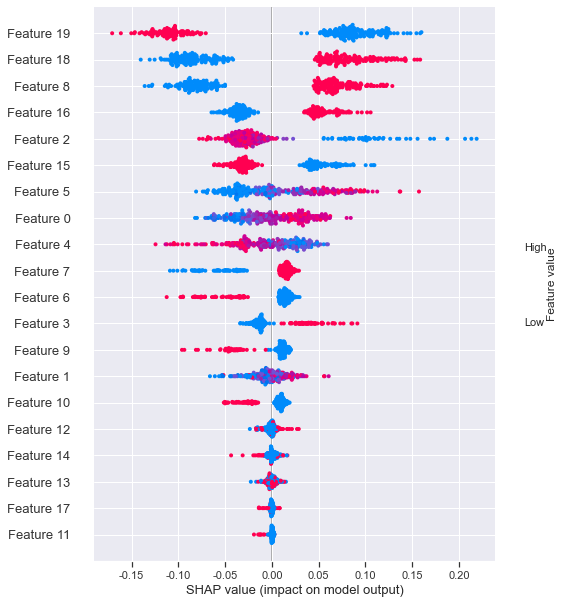

In [123]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test,check_additivity=False)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")
shap.summary_plot(shap_values[1], X_test)

## PLOT ROC CURVE

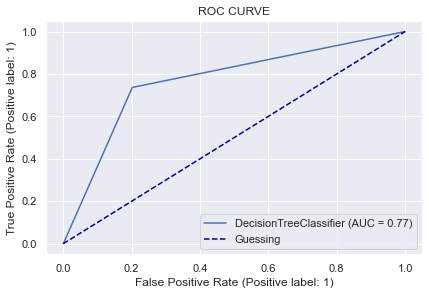

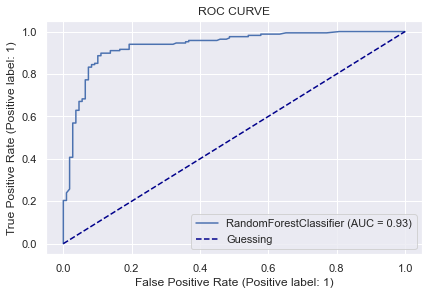

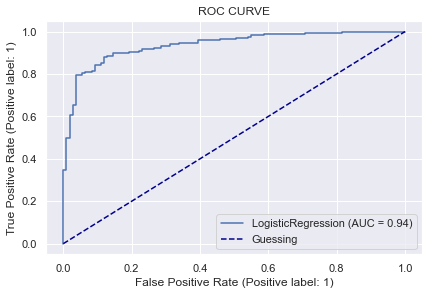

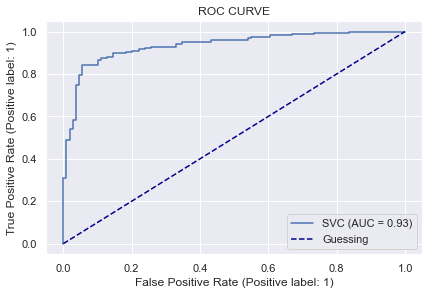

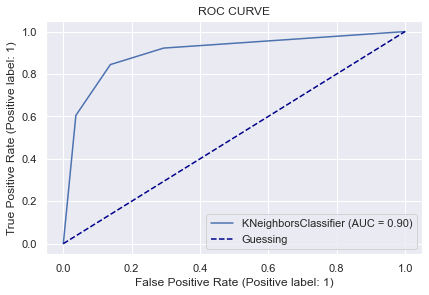

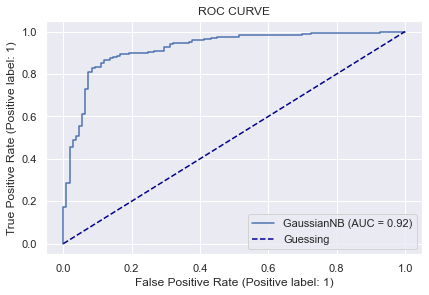

In [124]:
from sklearn.metrics import plot_roc_curve

for name, clf in classifiers.items():
    fig=plot_roc_curve(clf,X_test,y_test)
    # fig=plot_roc_curve(LGR,X_test,y_test,ax=fig.ax_)
    # fig=plot_roc_curve(clf_RF,X_test,y_test,ax=fig.ax_)
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    plt.title("ROC CURVE")
    plt.legend()
    plt.show()